In [99]:
# import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer import stargazer
from statsmodels.tools.eval_measures import mse,rmse

In [100]:
# Import the prewritten helper functions
from py_helper_functions import *

In [101]:
data = pd.read_csv("https://raw.githubusercontent.com/szilvasipeter2000/Data-Analysis-3/main/assignment-1/data/morg-2014-emp.csv")

# Filtering data for  Bookkeeping, accounting, and auditing clerks (5120) occupation

In [102]:
# Bookkeeping, accounting, and auditing clerks (5120)
f"There are {(data['occ2012'] == 5120).sum()} observations in the data for Bookkeeping, accounting, and auditing clerks (5120)"

'There are 1229 observations in the data for Bookkeeping, accounting, and auditing clerks (5120)'

In [103]:
# filter the data for this occupation
data = data[data['occ2012'] == 5120]

## EDA

In [104]:
data.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
135,302,220923095007449,January,AK,382.4086,961.53,25,40,4,NaN,...,3,5,"Native, Born In US",94,Offices of dentists (6212),5120,"Private, Nonprofit",No,No,Employed-At Work
276,611,41630340990697,January,AZ,3686.6660,420.00,40,39,1,1.0,...,2,4,"Native, Born In US",86,Traveler accommodation (7211),5120,"Private, For Profit",No,No,Employed-At Work
313,698,610944097303069,January,AZ,2627.1040,640.00,40,40,2,NaN,...,0,0,"Native, Born In US",86,"Accounting, tax preparation, bookkeeping, and ...",5120,Government - Local,No,No,Employed-At Work
522,1187,992055963039150,January,AR,1510.9541,290.00,40,41,1,NaN,...,0,0,"Native, Born In US",71,Individual and family services (6241),5120,"Private, Nonprofit",No,No,Employed-At Work
525,1199,965159070919006,January,AR,1709.1787,490.40,40,44,1,NaN,...,0,0,"Native, Born In US",71,Real estate (531),5120,"Private, For Profit",No,No,Employed-At Work


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 135 to 149106
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1229 non-null   int64  
 1   hhid        1229 non-null   int64  
 2   intmonth    1229 non-null   object 
 3   stfips      1229 non-null   object 
 4   weight      1229 non-null   float64
 5   earnwke     1229 non-null   float64
 6   uhours      1229 non-null   int64  
 7   grade92     1229 non-null   int64  
 8   race        1229 non-null   int64  
 9   ethnic      114 non-null    float64
 10  age         1229 non-null   int64  
 11  sex         1229 non-null   int64  
 12  marital     1229 non-null   int64  
 13  ownchild    1229 non-null   int64  
 14  chldpres    1229 non-null   int64  
 15  prcitshp    1229 non-null   object 
 16  state       1229 non-null   object 
 17  ind02       1229 non-null   object 
 18  occ2012     1229 non-null   int64  
 19  class       1229 non-nu

In [106]:
# peak at cols with values
data.T

,135,276,313,522,525,1216,1226,1296,1780,2025,...,148167,148390,148505,148587,148639,148745,148794,148802,149069,149106
Unnamed: 0,302,611,698,1187,1199,2715,2734,2897,3939,4444,...,314590,315015,315315,315468,315574,315853,315969,315990,316573,316628
hhid,220923095007449,41630340990697,610944097303069,992055963039150,965159070919006,300609985954539,340964097607078,660253073001300,103102310108528,707900960695189,...,702508660010281,315603026909595,671520701620509,35438100100705,310820176620065,596926705042439,502020018014469,508180416070401,128415050066200,591520448241005
intmonth,January,January,January,January,January,January,January,January,January,January,...,December,December,December,December,December,December,December,December,December,December
stfips,AK,AZ,AZ,AR,AR,CA,CA,CA,CO,CT,...,VT,VA,VA,WA,WA,WV,WV,WV,WI,WI
weight,382.4086,3686.666,2627.104,1510.9541,1709.1787,3095.2124,2971.6465,2878.5241,1801.9775,1204.0516,...,385.9919,2708.855,2666.8113,2698.7086,2666.3348,1296.0304,673.5209,673.5209,3677.216,2674.588
earnwke,961.53,420.0,640.0,290.0,490.4,90.0,800.0,596.15,600.0,130.0,...,700.0,1538.46,1538.0,510.0,1673.07,387.5,536.8,583.2,440.0,410.0
uhours,25,40,40,40,40,6,40,50,36,10,...,40,40,40,40,40,40,40,40,40,40
grade92,40,39,40,41,44,42,40,40,39,43,...,40,40,40,39,43,40,40,38,39,39
race,4,1,2,1,1,1,1,1,1,1,...,1,4,1,1,1,1,1,1,1,2
ethnic,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# look at null values
data.isnull().sum()

Unnamed: 0       0
hhid             0
intmonth         0
stfips           0
weight           0
earnwke          0
uhours           0
grade92          0
race             0
ethnic        1115
age              0
sex              0
marital          0
ownchild         0
chldpres         0
prcitshp         0
state            0
ind02            0
occ2012          0
class            0
unionmme         0
unioncov        66
lfsr94           0
dtype: int64

In [108]:
# why is ethnic so empty?
data.ethnic.value_counts()

1.0    67
7.0    12
2.0    11
8.0     8
3.0     6
4.0     6
6.0     3
5.0     1
Name: ethnic, dtype: int64

lot of missing data, can't even make imputation as we have too many missing values, not a good feature

In [109]:
# what about union cov (Covered by a union contract)
data.unioncov.value_counts()

No     1152
Yes      11
Name: unioncov, dtype: int64

not enough variance, so it doesn't make sense to deal with missing values. -> won't be included not a good feature

In [110]:
data.T

,135,276,313,522,525,1216,1226,1296,1780,2025,...,148167,148390,148505,148587,148639,148745,148794,148802,149069,149106
Unnamed: 0,302,611,698,1187,1199,2715,2734,2897,3939,4444,...,314590,315015,315315,315468,315574,315853,315969,315990,316573,316628
hhid,220923095007449,41630340990697,610944097303069,992055963039150,965159070919006,300609985954539,340964097607078,660253073001300,103102310108528,707900960695189,...,702508660010281,315603026909595,671520701620509,35438100100705,310820176620065,596926705042439,502020018014469,508180416070401,128415050066200,591520448241005
intmonth,January,January,January,January,January,January,January,January,January,January,...,December,December,December,December,December,December,December,December,December,December
stfips,AK,AZ,AZ,AR,AR,CA,CA,CA,CO,CT,...,VT,VA,VA,WA,WA,WV,WV,WV,WI,WI
weight,382.4086,3686.666,2627.104,1510.9541,1709.1787,3095.2124,2971.6465,2878.5241,1801.9775,1204.0516,...,385.9919,2708.855,2666.8113,2698.7086,2666.3348,1296.0304,673.5209,673.5209,3677.216,2674.588
earnwke,961.53,420.0,640.0,290.0,490.4,90.0,800.0,596.15,600.0,130.0,...,700.0,1538.46,1538.0,510.0,1673.07,387.5,536.8,583.2,440.0,410.0
uhours,25,40,40,40,40,6,40,50,36,10,...,40,40,40,40,40,40,40,40,40,40
grade92,40,39,40,41,44,42,40,40,39,43,...,40,40,40,39,43,40,40,38,39,39
race,4,1,2,1,1,1,1,1,1,1,...,1,4,1,1,1,1,1,1,1,2
ethnic,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature engineering

In [207]:
# create new variables
data["female"] = (data["sex"] == 2) # female is 2 in the data
data["w"] = data["earnwke"] / data["uhours"] # hourly wage
data["lnw"] = np.log(data["w"]) # log hourly wage
data["agesq"] = np.power(data["age"], 2) # age squared

# Plotting Distributions

- Wage
- ln wage
- grade92
- race
- age
- sex
- ownchild
- class

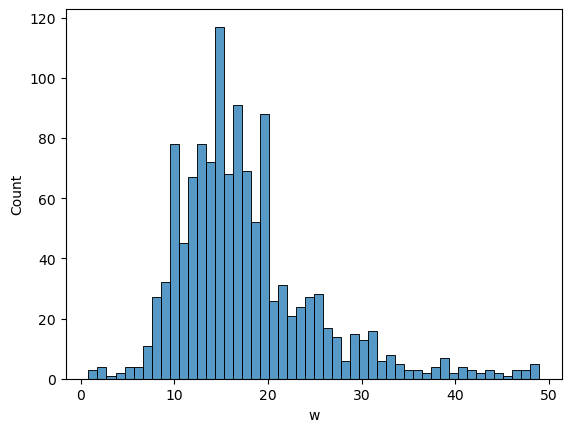

In [175]:
# plot wage distribution
sns.histplot(data['w'],palette='viridis',bins=50)
plt.show()

In [113]:
# search for outliers
data['w'].describe(percentiles=[0.5, 0.75, 0.95, 0.99])

count    1229.000000
mean       18.377854
std        12.343576
min         0.805714
50%        16.250000
75%        20.268250
95%        33.653750
99%        48.889330
max       276.920000
Name: w, dtype: float64

In [114]:
# filter for outliers
data = data.loc[data['w'] < 50]

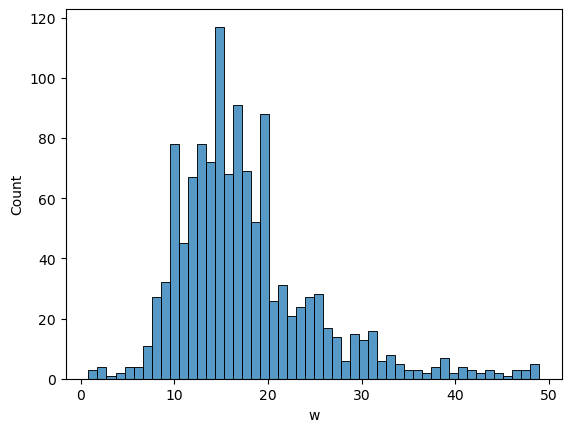

In [115]:
# plot wages after filtering
sns.histplot(data['w'],bins=50)
plt.show()

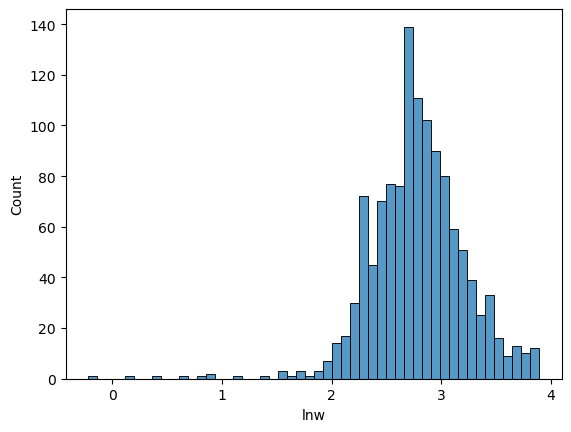

In [178]:
# plot ln wages
sns.histplot(data['lnw'],bins=50)
plt.show()

<Axes: xlabel='age', ylabel='Count'>

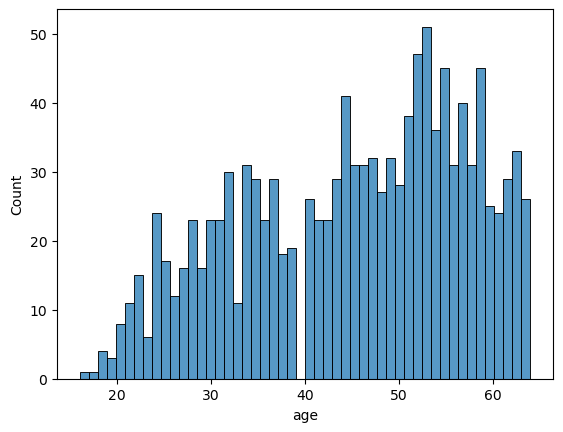

In [117]:
# plot age
sns.histplot(data['age'],bins=50)

<Axes: xlabel='grade92', ylabel='count'>

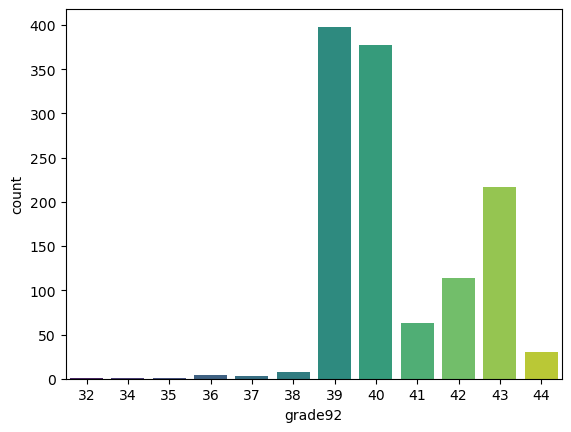

In [118]:
# plot grade92 (highest education completed)
sns.countplot(data=data, x='grade92', palette='viridis')


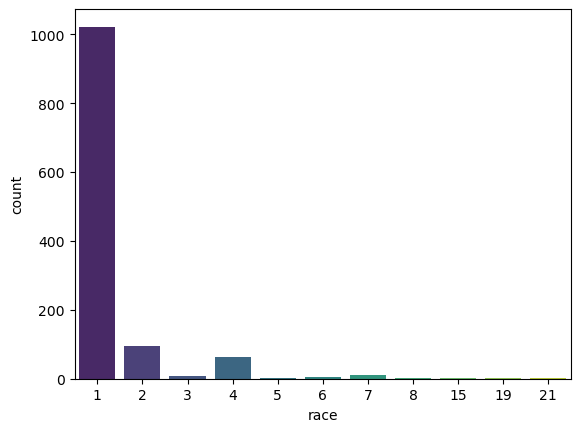

In [119]:
# plot race
sns.countplot(data=data, x = 'race', palette='viridis')
plt.show()

In [120]:
data.race.value_counts()

1     1022
2       95
4       62
7       12
3        9
6        6
5        3
8        3
21       2
15       2
19       1
Name: race, dtype: int64

not really a lot of variance. I will try to include it in the complex model. But my assumption is that it will not be a game changer

<Axes: xlabel='sex', ylabel='count'>

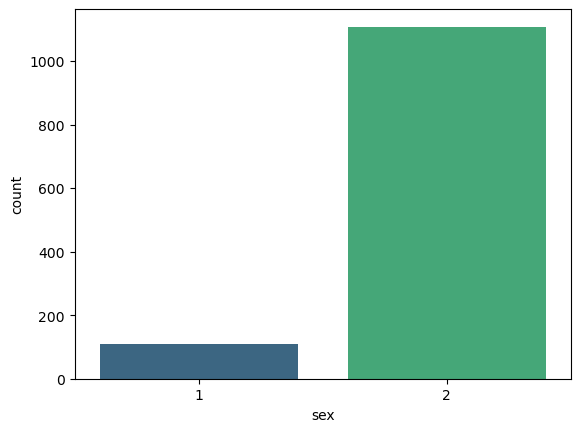

In [121]:
sns.countplot(data=data,x = 'sex', palette = 'viridis')

In [125]:
f"There are {(data.sex == 2).sum()} females and {(data.sex == 1).sum()} males in my subset of the data"

'There are 1108 females and 109 males in my subset of the data'

<Axes: xlabel='ownchild', ylabel='count'>

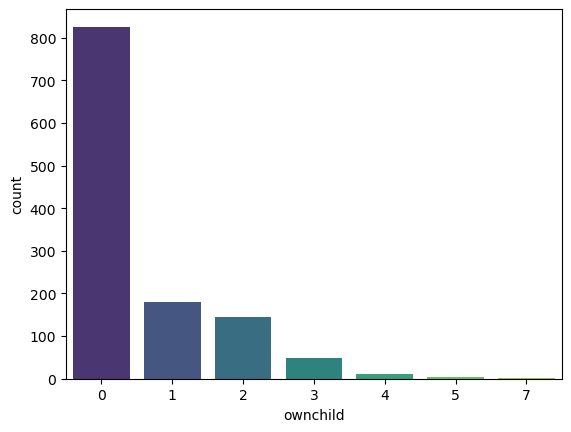

In [129]:
# plot number of children
sns.countplot(data = data,x = 'ownchild', palette = 'viridis')

<Axes: xlabel='count', ylabel='class'>

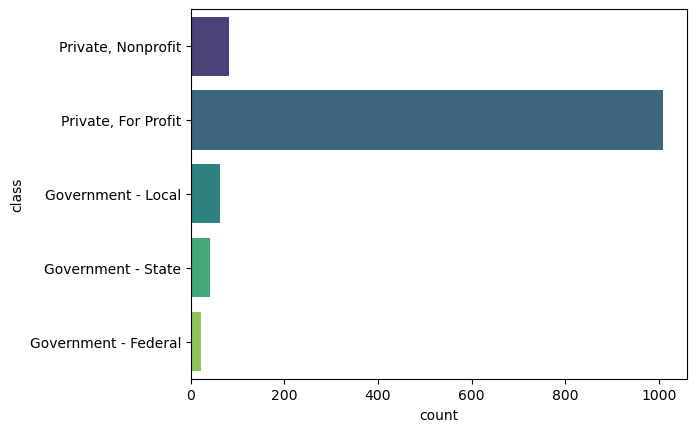

In [138]:
sns.countplot(data=data, y='class', palette='viridis', orient='h')


<Axes: xlabel='count', ylabel='prcitshp'>

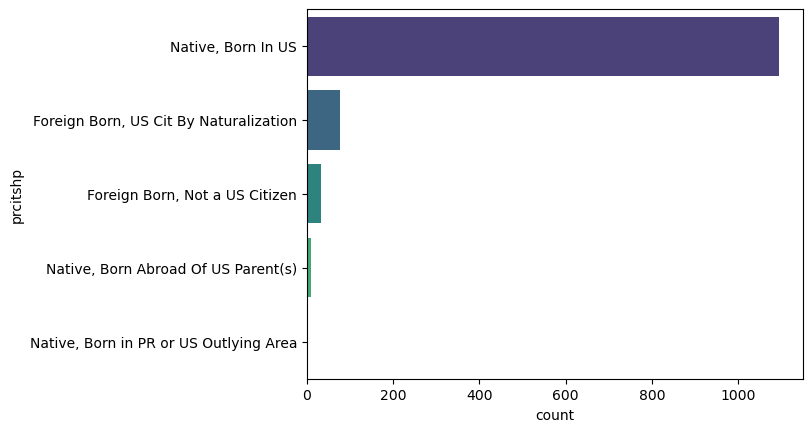

In [140]:
# look into other variables if they are relevant
# prcitshp (citizenship)
sns.countplot(data=data, y='prcitshp', palette='viridis', orient='h')

In [150]:
data.groupby(by='prcitshp').mean()['w'].reset_index().sort_values(by='w')

,prcitshp,w
4,"Native, Born in PR or US Outlying Area",16.625000
0,"Foreign Born, Not a US Citizen",16.704779
3,"Native, Born In US",17.525249
1,"Foreign Born, US Cit By Naturalization",19.050169
2,"Native, Born Abroad Of US Parent(s)",20.869639


not so much variance, aggregates are interesting

In [202]:
# states
# create a dataframe which is groupying by states, and shows the mean wage and frequency of the states
data.groupby("stfips").agg(frequency=("w", 'size'), mean=("w", np.mean)).reset_index().sort_values(by='frequency', ascending=False)




,stfips,frequency,mean
4,CA,98,20.560722
43,TX,64,15.890283
34,NY,63,20.646893
9,FL,58,17.132597
14,IL,40,16.586011
5,CO,33,17.635111
23,MN,33,16.781306
31,NJ,32,18.915403
35,OH,31,17.286891
50,WY,28,19.581425


# Regression Analysis

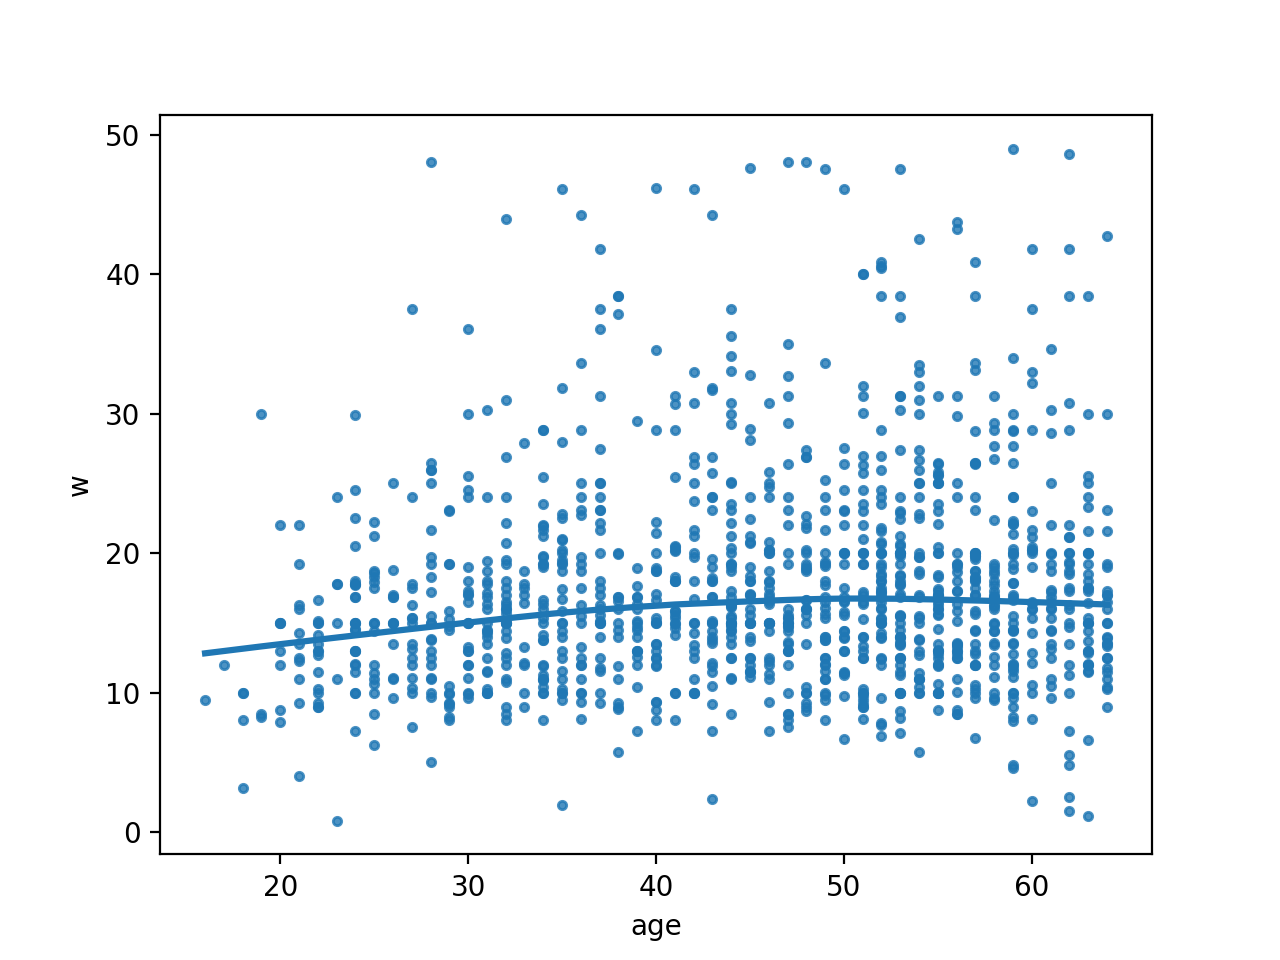

In [205]:
# start with Lowess
sns.regplot(
    data = data,
    x = 'age', y = 'w', 
    marker= '.',
    fit_reg= True, lowess= True);

In [211]:
data[['w','age','ownchild']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
w,1217.0,17.62,7.57,0.81,12.5,16.05,20.0,49.0
age,1217.0,45.24,12.02,16.00,36.0,47.00,55.0,64.0
ownchild,1217.0,0.57,0.97,0.00,0.0,0.00,1.0,7.0
